In [1]:
import sys
sys.path.insert(1, '..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from ProdSeqAnalysis_utils import *
# plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams["font.family"] = "Arial"
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
# CountUMIPairs(R1_file, R2_file, barcodes, arm_find_seq, UMI_len)

H4_bc = "TGTATCAGTT"
H3K4me3_bc = "GTAGTGGCAT"
H3K27ac_bc = "GTTATTAGGC"
H3K27me3_bc = "TAACATGCGG"
EZH2_bc = "TGGCTAATGT"
EGFR_bc = "TGACCTTATG"
HAtag_bc = "GATTGTCCGC"
H3K27M_bc = "CACGATTGTT"
AEBP2_bc = "TTGCATGGTA"
EED_bc = "TTGAGTAACC"
SUZ12_bc = "TGAGTCGATT"
MED12_bc = "CTATGTTGGT"
CycC_bc = "GAGGATAAGT"

All12_pool = [
    H3K4me3_bc, 
    H3K27ac_bc, 
    H3K27me3_bc, EZH2_bc, EED_bc, SUZ12_bc, AEBP2_bc, 
    MED12_bc, CycC_bc, 
    H3K27M_bc,
    EGFR_bc, HAtag_bc
]

bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

XmnI_midseq = "TAGAGAAG"

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

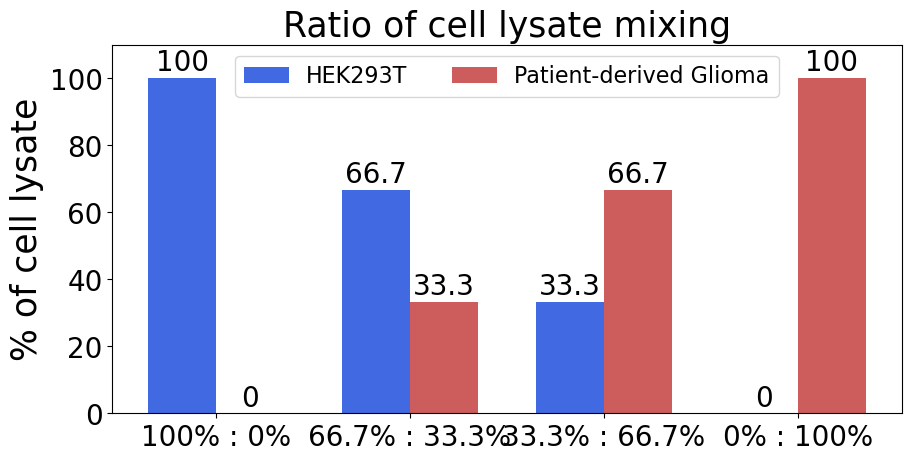

In [3]:
conditions = ("100% : 0%", "66.7% : 33.3%", "33.3% : 66.7%", "0% : 100%")
cell_lines = {
    'HEK293T': (100, 66.7, 33.3, 0),
    'Patient-derived Glioma': (0, 33.3, 66.7, 100)
}

x = np.arange(len(conditions))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (9, 4.5))

for attribute, measurement in cell_lines.items():
    offset = width * multiplier
    if (attribute == "Patient-derived Glioma"):
        color_use = "indianred"
    else:
        color_use = "royalblue"
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = color_use)
    ax.bar_label(rects, padding=1, fontsize = 20)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of cell lysate', fontsize = 25)
ax.set_title('Ratio of cell lysate mixing', fontsize = 25)
ax.set_xticks(x + width/2, conditions)
ax.legend(loc='upper center', ncols=2, fontsize = 16)
ax.set_ylim(0, 110)
ax.tick_params(axis='both', labelsize=20)

plt.show()

# fig.savefig("mixing_expr_setup.svg", dpi = 1200)

In [4]:
mixing_readprop_path = "/path/to/mixing_output/mixing_output.DepthNormedUMIPairs.tsv"
mixing_readprop_lines = [x.strip().split("\t") for x in (open(mixing_readprop_path).readlines())]
mixing_PPI_nms = (mixing_readprop_lines[0])[1:]
mixing_sample_nms = [x[0] for x in mixing_readprop_lines[1:]]
mixing_readprop = []
for row in mixing_readprop_lines[1:]:
    curr_row = [float(x) for x in row[1:]]
    mixing_readprop.append([x / sum(curr_row) for x in curr_row])

In [5]:
mixing_sample_nms

['HEKWT_3_0_DIPG36_T1',
 'HEKWT_2_1_DIPG36_T1',
 'HEKWT_1_2_DIPG36_T1',
 'HEKWT_0_3_DIPG36_T1',
 'HEKWT_3_0_DIPG36_T2',
 'HEKWT_2_1_DIPG36_T2',
 'HEKWT_1_2_DIPG36_T2',
 'HEKWT_0_3_DIPG36_T2']

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

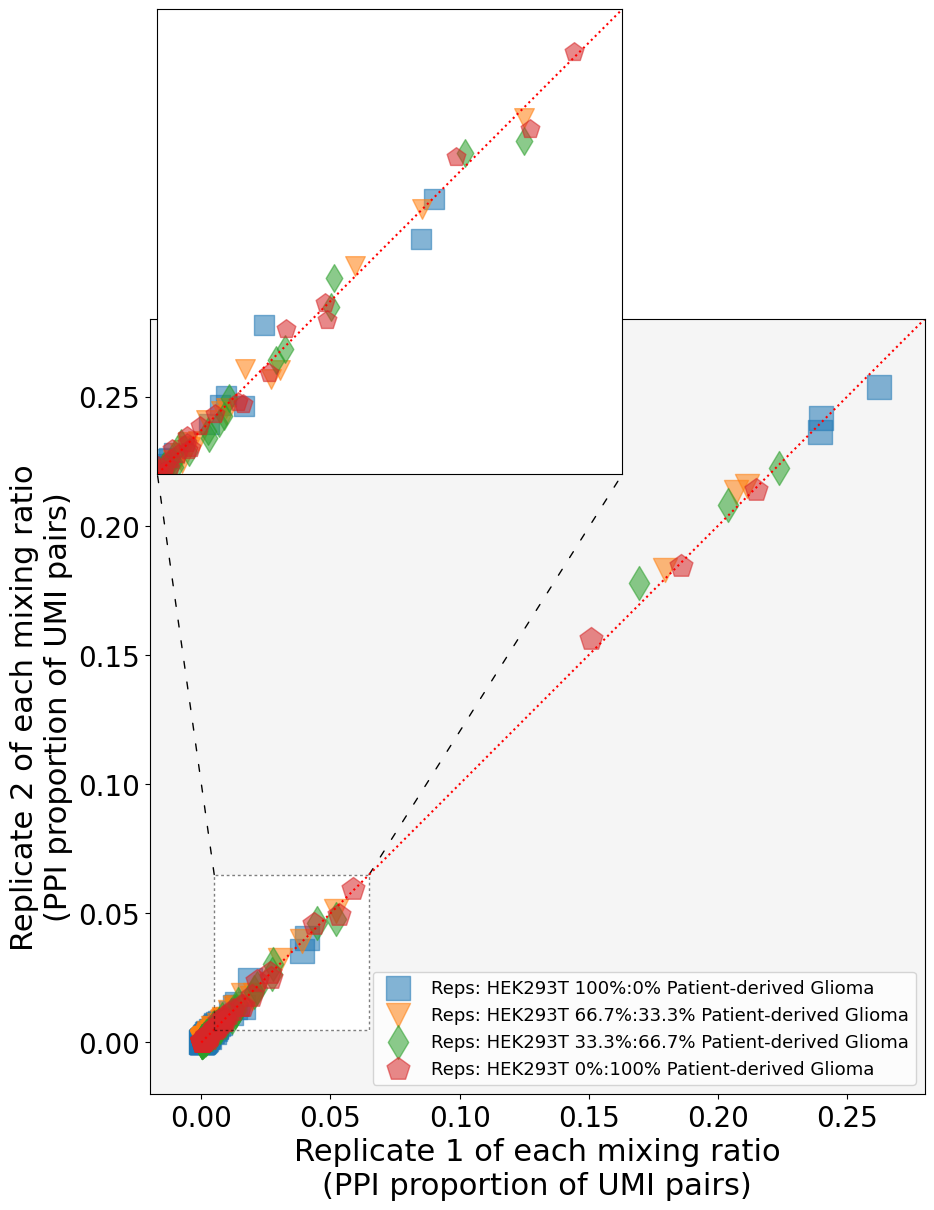

In [6]:
fig = plt.figure(figsize = (10, 20))

ax = plt.gca()
ax.set_facecolor('whitesmoke')
x1, x2, y1, y2 = 0.005, 0.065, 0.005, 0.065  # subregion of the original image
ax.fill_between([x1, x2], [y1, y1], y2 = [y2, y2], color = "white")

curr_max = np.max(mixing_readprop) * 1.3
curr_min = np.min(mixing_readprop) / 1.3
plt.plot([0, curr_max], [0, curr_max], linestyle=':', c = "red")
shapes = ["s", "v", "d", "p"]
plt.scatter(mixing_readprop[0], mixing_readprop[4], s = 300,
            label = "Reps: HEK293T 100%:0% Patient-derived Glioma", alpha = 0.55, marker = shapes[0])

plt.scatter(mixing_readprop[1], mixing_readprop[5], s = 300,
            label = "Reps: HEK293T 66.7%:33.3% Patient-derived Glioma", alpha = 0.55, marker = shapes[1])

plt.scatter(mixing_readprop[2], mixing_readprop[6], s = 300,
            label = "Reps: HEK293T 33.3%:66.7% Patient-derived Glioma", alpha = 0.55, marker = shapes[2])

plt.scatter(mixing_readprop[3], mixing_readprop[7], s = 300,
            label = "Reps: HEK293T 0%:100% Patient-derived Glioma", alpha = 0.55, marker = shapes[3])

plt.legend(loc = "lower right", fontsize = 13)
ax = plt.gca()
ax.set_xlim([-0.02, 0.28])
ax.set_ylim([-0.02, 0.28])

plt.xlabel("Replicate 1 of each mixing ratio\n(PPI proportion of UMI pairs)", fontsize = 22)
plt.ylabel("Replicate 2 of each mixing ratio\n(PPI proportion of UMI pairs)", fontsize = 22)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)

axins = ax.inset_axes(
    [0.01, 0.8, 0.6, 0.6],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[], xticks = [], yticks = [])

ax.indicate_inset((0.005, 0.005, 0.06, 0.06), ec = "black", lw = 1, ls = (0, (2, 2)))


axins.set_xlim([0.005, 0.065])
axins.set_ylim([0.005, 0.065])
axins.plot([0, 0.3], [0, 0.3], linestyle=':', c = "red")


axins.scatter(mixing_readprop[0], mixing_readprop[4], s = 200, alpha = 0.55, marker = shapes[0])

axins.scatter(mixing_readprop[1], mixing_readprop[5], s = 200, alpha = 0.55, marker = shapes[1])

axins.scatter(mixing_readprop[2], mixing_readprop[6], s = 200, alpha = 0.55, marker = shapes[2])

axins.scatter(mixing_readprop[3], mixing_readprop[7], s = 200, alpha = 0.55, marker = shapes[3])

con1 = ConnectionPatch(xyA = (0.005, 0.065), coordsA=ax.transData, axesA = ax,
                      xyB = (0, 0), coordsB="axes fraction", axesB = axins,
                      color="black", linewidth=1, ls = (0, (5, 10)))
con2 = ConnectionPatch(xyA = (0.065, 0.065), coordsA=ax.transData, axesA = ax,
                      xyB = (1, 0), coordsB="axes fraction", axesB = axins,
                      color="black", linewidth=1, ls = (0, (5, 10)))
ax.add_artist(con1)
ax.add_artist(con2)
ax.set_aspect('equal')

# fig.savefig("scatter_lysate_reps.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

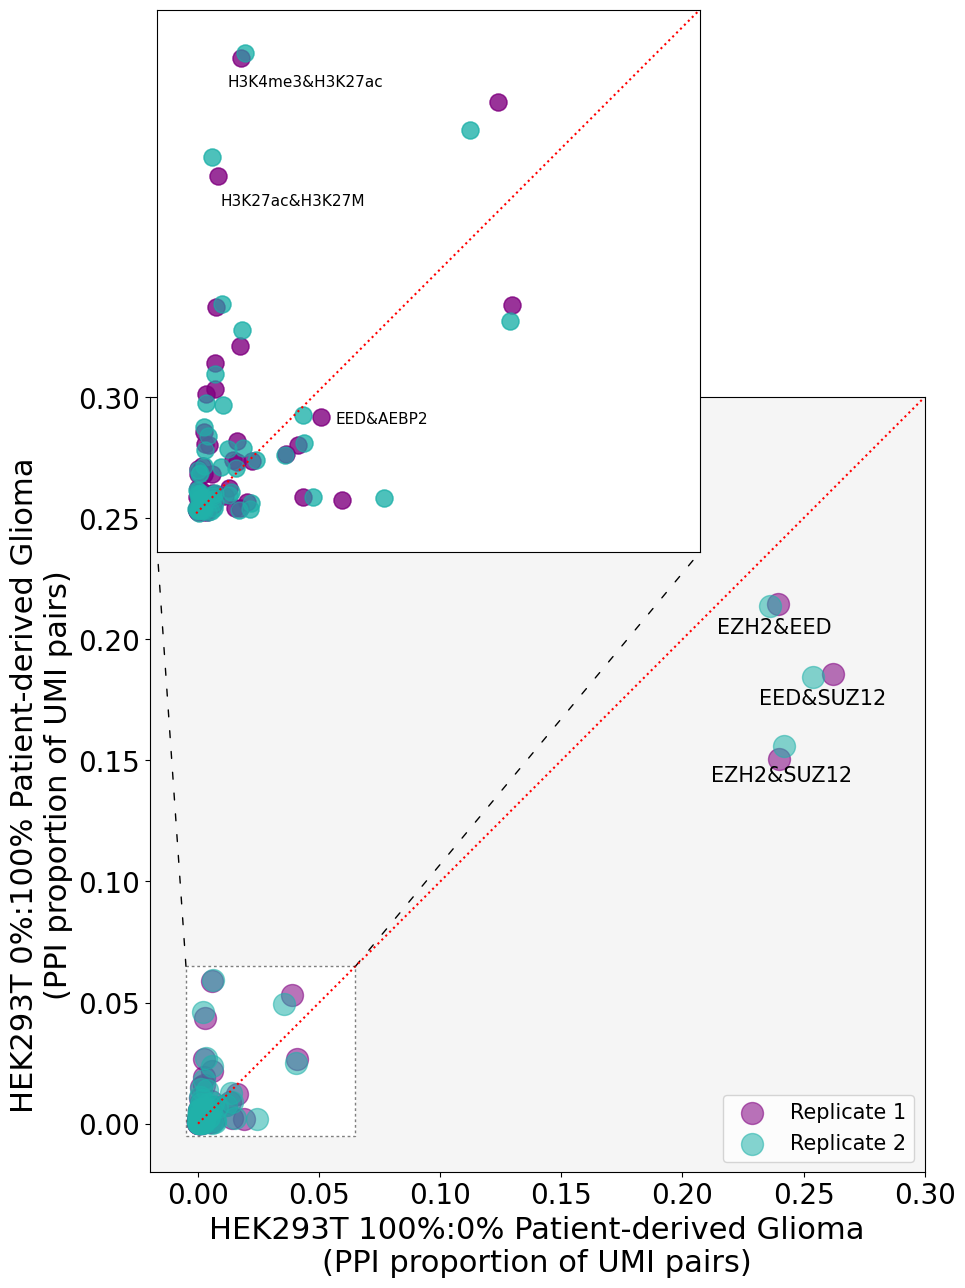

In [7]:
fig = plt.figure(figsize = (10, 20))

ax = plt.gca()
ax.set_facecolor('whitesmoke')
x1, x2, y1, y2 = -0.005, 0.065, -0.005, 0.065  # subregion of the original image
ax.fill_between([x1, x2], [y1, y1], y2 = [y2, y2], color = "white")

curr_max = np.max(mixing_readprop) * 1.3
curr_min = np.min(mixing_readprop) / 1.3
shapes = ["s", "v", "d", "p"]
plt.scatter(mixing_readprop[0], mixing_readprop[3], s = 250,
            label = "Replicate 1", alpha = 0.55, marker = "o", c = "purple")

plt.scatter(mixing_readprop[4], mixing_readprop[7], s = 250,
            label = "Replicate 2", alpha = 0.55, marker = "o", c = "lightseagreen")

PPI_plot_nms = ["EZH2&EED", "EED&SUZ12", "EZH2&SUZ12"]
for idx in range(len(mixing_PPI_nms)):
    curr_nm = mixing_PPI_nms[idx]
    if (curr_nm in PPI_plot_nms):
        text_x = (mixing_readprop[0][idx] + mixing_readprop[4][idx]) / 2
        text_y = (mixing_readprop[3][idx] + mixing_readprop[7][idx]) / 2 - 0.012
        ax.text(text_x, text_y, curr_nm, ha = "center", fontsize = 15)


plt.legend(loc = "lower right", fontsize = 15)

ax.set_xlim([-0.02, 0.3])
ax.set_ylim([-0.02, 0.3])
plt.plot([0, 0.3], [0, 0.3], linestyle=':', c = "red")
plt.xlabel("HEK293T 100%:0% Patient-derived Glioma\n(PPI proportion of UMI pairs)", fontsize = 22)
plt.ylabel("HEK293T 0%:100% Patient-derived Glioma\n(PPI proportion of UMI pairs)", fontsize = 22)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)

axins = ax.inset_axes(
    [0.01, 0.8, 0.7, 0.7],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[], xticks = [], yticks = [])


ax.indicate_inset((-0.005, -0.005, 0.07, 0.07), ec = "black", lw = 1, ls = (0, (2, 2)))

axins.scatter(mixing_readprop[0], mixing_readprop[3], s = 150,
            label = "Replicate 1", alpha = 0.55, marker = "o", c = "purple")

axins.scatter(mixing_readprop[4], mixing_readprop[7], s = 150,
            label = "Replicate 2", alpha = 0.55, marker = "o", c = "lightseagreen")


axins.scatter(mixing_readprop[0], mixing_readprop[3], s = 150,
            label = "Replicate 1", alpha = 0.55, marker = "o", c = "purple")

axins.scatter(mixing_readprop[4], mixing_readprop[7], s = 150,
            label = "Replicate 2", alpha = 0.55, marker = "o", c = "lightseagreen")

PPI_plot_nms = ["H3K27ac&H3K27M", "H3K4me3&H3K27ac", "EED&AEBP2"]
x_offset = [0.002, 0.004, 0.003]
y_offset = [0, -0.001, 0.003]
offset_idx = 0
for idx in range(len(mixing_PPI_nms)):
    curr_nm = mixing_PPI_nms[idx]
    if (curr_nm in PPI_plot_nms):
        text_x = (mixing_readprop[0][idx] + mixing_readprop[4][idx]) / 2 + 0.006 + x_offset[offset_idx]
        text_y = (mixing_readprop[3][idx] + mixing_readprop[7][idx]) / 2 - 0.004 + y_offset[offset_idx]
        offset_idx += 1
        axins.text(text_x, text_y, curr_nm, ha = "center", fontsize = 11)
        # axins.scatter(mixing_readprop[0][idx], mixing_readprop[3][idx])
        # axins.scatter(mixing_readprop[4][idx], mixing_readprop[7][idx])
axins.set_xlim([-0.005, 0.065])
axins.set_ylim([-0.005, 0.065])
axins.plot([0, 0.3], [0, 0.3], linestyle=':', c = "red")

con1 = ConnectionPatch(xyA = (-0.005, 0.065), coordsA=ax.transData, axesA = ax,
                      xyB = (0, 0), coordsB="axes fraction", axesB = axins,
                      color="black", linewidth=1, ls = (0, (5, 10)))
con2 = ConnectionPatch(xyA = (0.065, 0.065), coordsA=ax.transData, axesA = ax,
                      xyB = (1, 0), coordsB="axes fraction", axesB = axins,
                      color="black", linewidth=1, ls = (0, (5, 10)))
ax.add_artist(con1)
ax.add_artist(con2)
ax.set_aspect('equal')

# fig.savefig("scatter_lysate_ratios.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

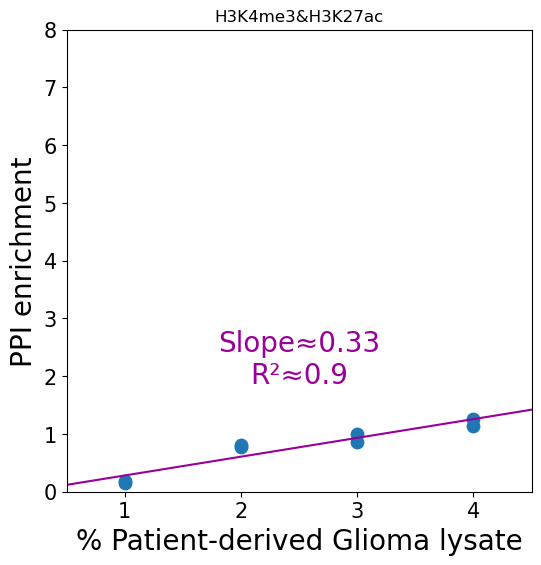

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

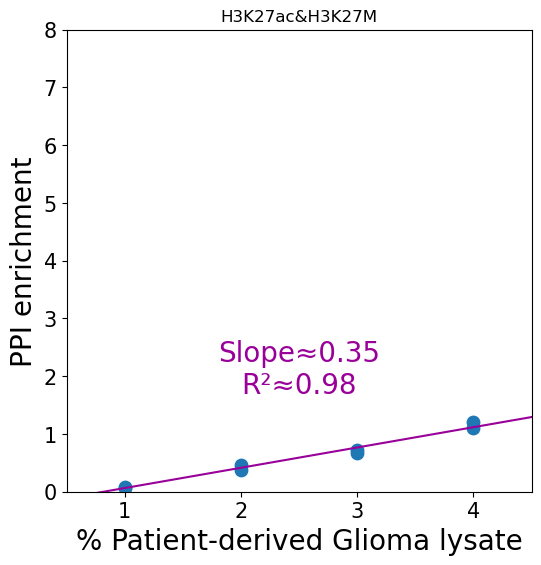

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

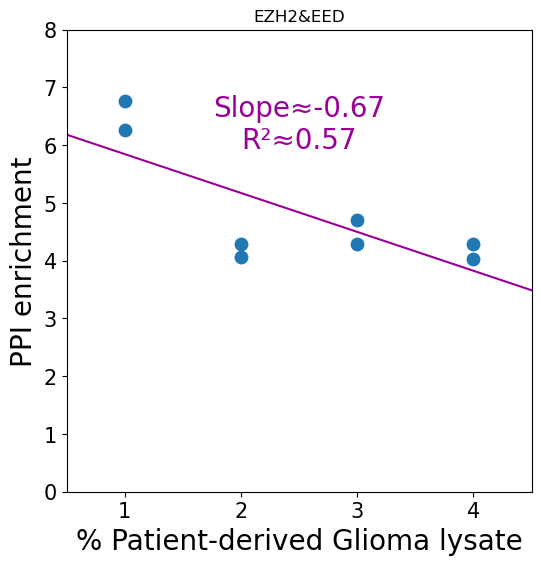

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

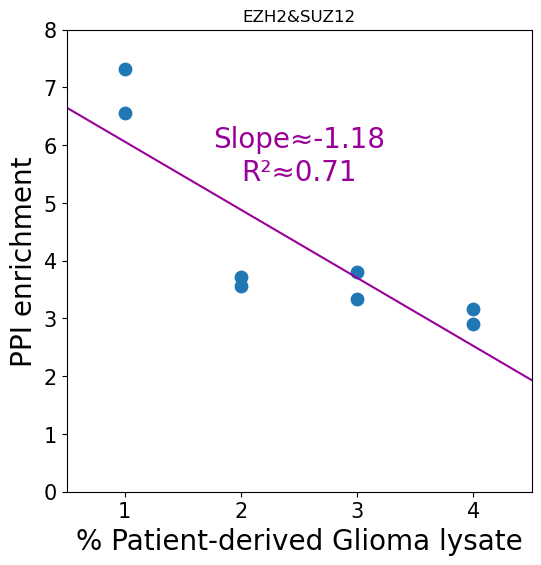

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

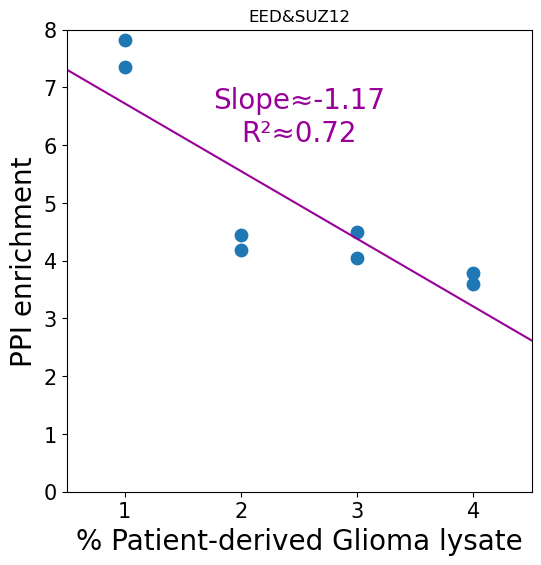

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

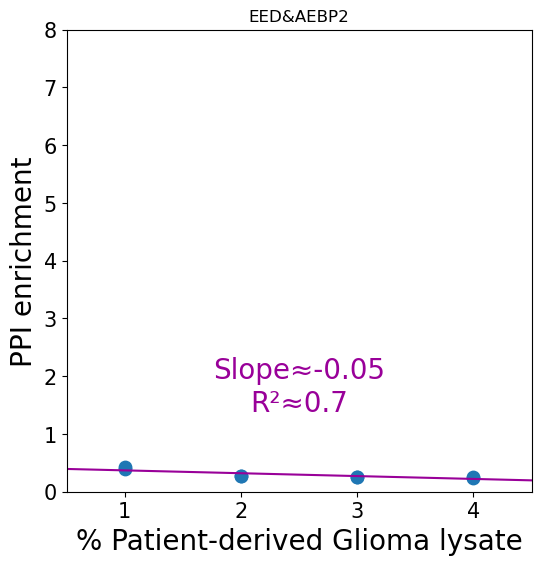

In [8]:
mixing_tsv_path = "/path/to/mixing_output.PPIEnrichment.tsv"

mixing_signal_lines = [x.strip().split("\t") for x in (open(mixing_tsv_path).readlines())]
mixing_PPI_nms = (mixing_signal_lines[0])[1:]
mixing_sample_nms = [x[0] for x in mixing_signal_lines[1:]]
mixing_signals = []
for row in mixing_signal_lines[1:]:
    curr_row = row[1:]
    mixing_signals.append([float(x) / float(curr_row[49]) for x in curr_row])

x_vec = [[1], [2], [3], [4], [1], [2], [3], [4]]
betas_vec = []
plot_pairs = ["EZH2&EED", "EED&SUZ12", "EZH2&SUZ12", "H3K27ac&H3K27M", "H3K4me3&H3K27ac", "EED&AEBP2"]
for idx in range(len(mixing_PPI_nms)):
    
    curr_yvec = [[x[idx]] for x in mixing_signals]
    
    reg = LinearRegression().fit(x_vec, curr_yvec)
    betas_vec.append([mixing_PPI_nms[idx], (reg.coef_)[0], reg.score(x_vec, curr_yvec)])

    if (mixing_PPI_nms[idx] in plot_pairs):
        curr_fig, curr_ax = plt.subplots(figsize = (6, 6))
        curr_ax.scatter(x_vec, curr_yvec, s = 80)
        curr_ax.set_xlim([0.5, 4.5])
        curr_ax.set_ylim(0, 8)
        curr_ax.set_xlabel("% Patient-derived Glioma lysate", fontsize = 20)
        curr_ax.set_ylabel("PPI enrichment", fontsize = 20)
        curr_ax.set_title(mixing_PPI_nms[idx])
        curr_ax.plot([0.5, 4.5], [0.5 * (reg.coef_)[0] + reg.intercept_, 4.5 * (reg.coef_)[0] + reg.intercept_],
              color = (0.6, 0, 0.6))
        curr_ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
        curr_ax.text(2.5, 2.5 * (reg.coef_)[0] + reg.intercept_ + 1,
               "Slope\u2248" + str(round(reg.coef_[0][0], 2)) + "\n" + "R\u00B2\u2248" + str(round(reg.score(x_vec, curr_yvec), 2)),
              color = (0.6, 0, 0.6), fontsize = 20, ha = "center", va = "bottom")
        # curr_fig.savefig(mixing_PPI_nms[idx] + "_linearregression.svg", dpi = 1200)
  

In [9]:
betas_vec

[['H3K4me3&H3K27ac', array([0.32541177]), 0.9034929874947857],
 ['H3K4me3&H3K27me3', array([-0.0423978]), 0.8320894611616596],
 ['H3K4me3&EZH2', array([-0.00280225]), 0.32721306474801604],
 ['H3K4me3&EED', array([0.0071107]), 0.27383829168606477],
 ['H3K4me3&SUZ12', array([-0.02722598]), 0.7645180051425817],
 ['H3K4me3&AEBP2', array([-0.00062137]), 0.07050438053300057],
 ['H3K4me3&MED12', array([0.00277973]), 0.34978135900981877],
 ['H3K4me3&CycC', array([0.0116844]), 0.5384093395181868],
 ['H3K4me3&H3K27M', array([0.07630101]), 0.9793946384385636],
 ['H3K4me3&EGFR', array([0.01414268]), 0.8000501745717268],
 ['H3K27ac&H3K27me3', array([-0.02236354]), 0.5161834409197781],
 ['H3K27ac&EZH2', array([0.04366365]), 0.7932583141832631],
 ['H3K27ac&EED', array([0.14555406]), 0.8831058993977674],
 ['H3K27ac&SUZ12', array([0.09152903]), 0.7404006010881793],
 ['H3K27ac&AEBP2', array([0.01282075]), 0.7301513968121872],
 ['H3K27ac&MED12', array([0.03060473]), 0.7981118167107496],
 ['H3K27ac&CycC',

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

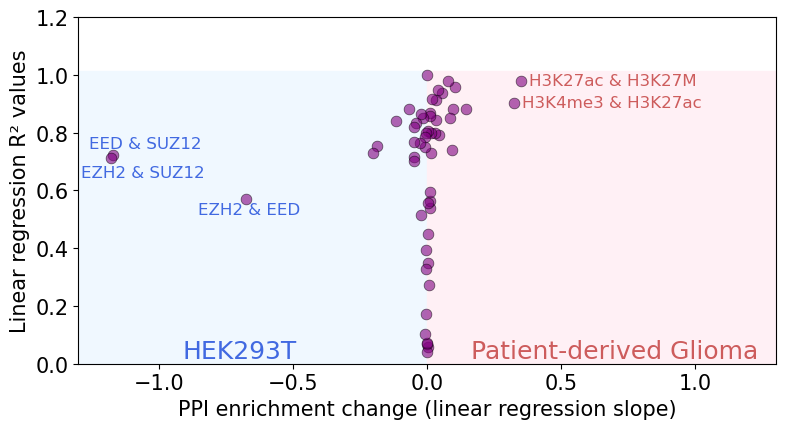

In [10]:

fig, ax = plt.subplots(figsize = (9, 4.5))
betas_vec.sort(key = lambda x : x[1], reverse = True)
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(0, 1.2)
ax.fill_between([-1.3, 0], [1.015, 1.015], color = "aliceblue")
ax.fill_between([0, 1.3], [1.015, 1.015], color = "lavenderblush")

# ax.scatter([x[1][0] for x in betas_vec], [x[2] for x in betas_vec], color = "black", alpha = 0.3,
#           s = 60)

ax.scatter([x[1][0] for x in betas_vec], [x[2] for x in betas_vec], color = "purple", alpha = 0.6,
          s = 60, edgecolor = "black", linewidths = 0.5)

ax.set_xlabel("PPI enrichment change (linear regression slope)", fontsize = 15)
ax.set_ylabel("Linear regression R\u00B2 values", fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.text(-0.7, 0.02, "HEK293T", fontsize = 18, ha = "center", color = "royalblue")
plt.text(0.7, 0.02, "Patient-derived Glioma", fontsize = 18, ha = "center", color = "indianred")

blue_offsets = [[0.2, -0.04], [0.33, 0.04], [0.35, -0.05]]
blue_offset_idx = 0
for idx in range(len(betas_vec)):
    curr_entry = betas_vec[idx]
    curr_split = curr_entry[0].split("&")
    curr_text = curr_split[0] + " & " + curr_split[1]
    if (curr_entry[1][0] > 0.2):
        ax.text(curr_entry[1][0] + 0.03, curr_entry[2], curr_text,
                ha = "left", va = "center", color = "indianred", fontsize = 12)
    if (curr_entry[1][0] < -0.5):
        ax.text(curr_entry[1][0] + blue_offsets[blue_offset_idx][0],
                curr_entry[2] + blue_offsets[blue_offset_idx][1], curr_text,
                ha = "right", va = "center", color = "royalblue", fontsize = 12)
        blue_offset_idx += 1

# fig.savefig("R2_volcano.svg", dpi = 1200)